In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline
import math

## Выделить и посчитать ложки и сахар


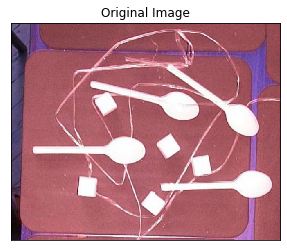

In [2]:
image = cv.imread("SpoonsAndSugars.png")

plt.subplot(),plt.imshow(image, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

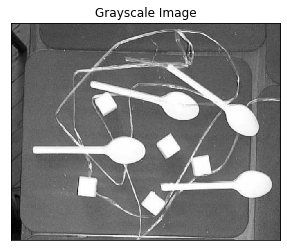

In [3]:
img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.subplot(),plt.imshow(img, cmap = 'gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])
plt.show()

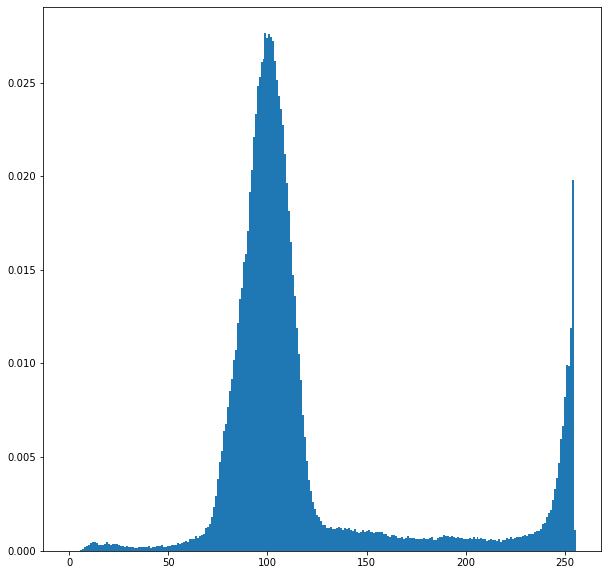

In [5]:
histogram = np.zeros(256, np.uint16)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        histogram[img[i, j]] += 1
histogram = histogram/(img.shape[0]*img.shape[1]) 
plt.figure(figsize = (10, 10))
plt.bar(range(256), histogram, 1)
plt.show()

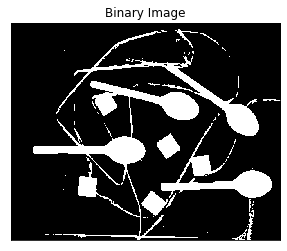

In [6]:
ret, thresh = cv.threshold(img,150,255,cv.THRESH_BINARY)
plt.subplot(),plt.imshow(thresh, cmap = 'gray')
plt.title('Binary Image'), plt.xticks([]), plt.yticks([])
plt.show()

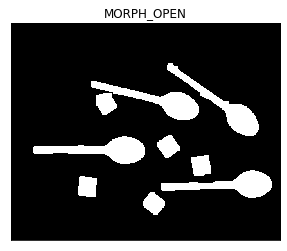

In [7]:
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 5)

plt.subplot(),plt.imshow(opening, cmap = 'gray')
plt.title('MORPH_OPEN'), plt.xticks([]), plt.yticks([])
plt.show()

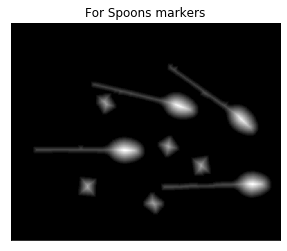

In [8]:
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)

plt.subplot(),plt.imshow(dist_transform, cmap = 'gray')
plt.title('For Spoons markers'), plt.xticks([]), plt.yticks([])
plt.show()

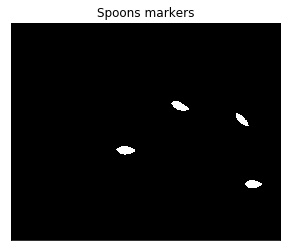

In [9]:
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)

plt.subplot(),plt.imshow(sure_fg, cmap = 'gray')
plt.title('Spoons markers'), plt.xticks([]), plt.yticks([])
plt.show()

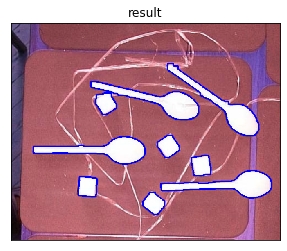

In [10]:
contoursSpoons, hierarchy = cv.findContours(sure_fg,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
spoonsCount = len(contoursSpoons)
contours, hierarchy = cv.findContours(opening,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
result = cv.drawContours(image, contours, -1, (0, 0, 255), 2, cv.LINE_AA, hierarchy, 2)

plt.subplot(),plt.imshow(result, cmap = 'gray')
plt.title('result'), plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
print("Количество всех предметов = ", len(contours))
print("Количество ложек = ", spoonsCount)
print("Количество сахара = ", len(contours) - spoonsCount)

Количество всех предметов =  9
Количество ложек =  4
Количество сахара =  5


## Выделить и посчитать монеты разных диаметров


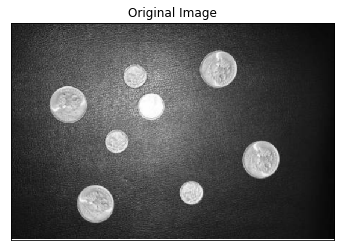

In [12]:
image = cv.imread("Coins.png")

plt.subplot(),plt.imshow(image, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

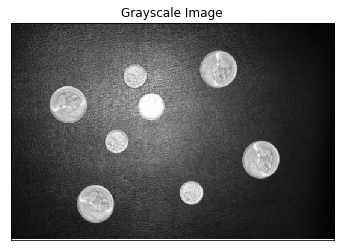

In [13]:
img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.subplot(),plt.imshow(img, cmap = 'gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])
plt.show()

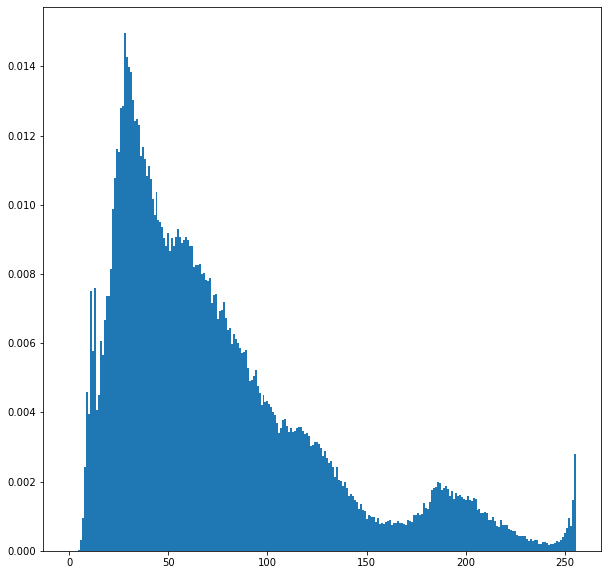

In [15]:
histogram = np.zeros(256, np.uint16)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        histogram[img[i, j]] += 1
histogram = histogram/(img.shape[0]*img.shape[1]) 
plt.figure(figsize = (10, 10))
plt.bar(range(256), histogram, 1)
plt.show()

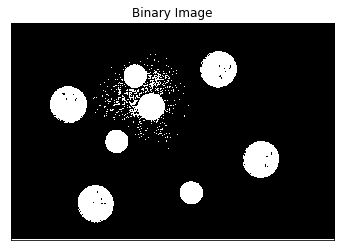

In [16]:
ret, thresh = cv.threshold(img,150,255,cv.THRESH_BINARY)

plt.subplot(),plt.imshow(thresh, cmap = 'gray')
plt.title('Binary Image'), plt.xticks([]), plt.yticks([])
plt.show()

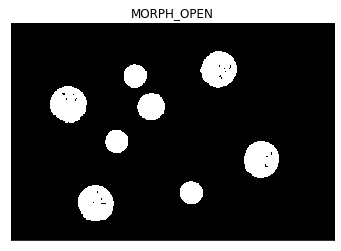

In [17]:
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

plt.subplot(),plt.imshow(opening, cmap = 'gray')
plt.title('MORPH_OPEN'), plt.xticks([]), plt.yticks([])
plt.show()

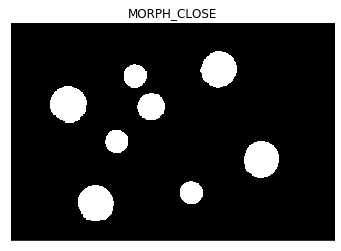

In [18]:
close = cv.morphologyEx(opening,cv.MORPH_CLOSE,kernel, iterations = 2)

plt.subplot(),plt.imshow(close, cmap = 'gray')
plt.title('MORPH_CLOSE'), plt.xticks([]), plt.yticks([])
plt.show()

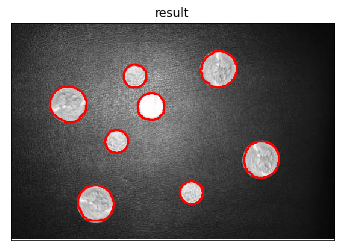

Количество всех монет =  8


In [19]:
contours, hierarchy = cv.findContours(close,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
result = cv.drawContours(image, contours, -1, (255, 0, 0), 2, cv.LINE_AA, hierarchy, 2)

plt.subplot(),plt.imshow(result, cmap = 'gray')
plt.title('result'), plt.xticks([]), plt.yticks([])
plt.show()

print("Количество всех монет = ", len(contours))

## Выделить и посчитать номера машин

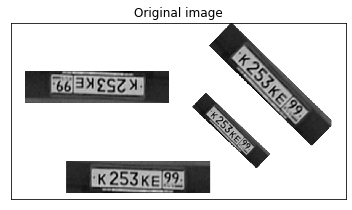

In [20]:
image = cv.imread('Cars.png')
plt.subplot(),plt.imshow(image, cmap='gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.show()

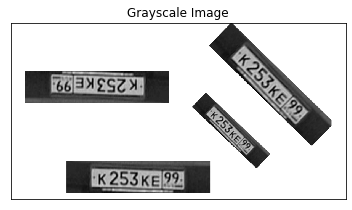

In [21]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.subplot(),plt.imshow(gray, cmap = 'gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])
plt.show()

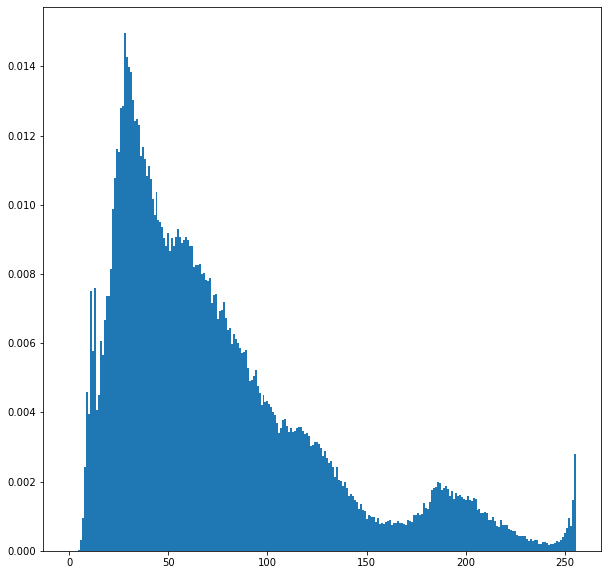

In [22]:
histogram = np.zeros(256, np.uint16)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        histogram[img[i, j]] += 1
histogram = histogram/(img.shape[0]*img.shape[1]) 
plt.figure(figsize = (10, 10))
plt.bar(range(256), histogram, 1)
plt.show()

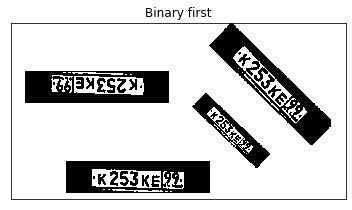

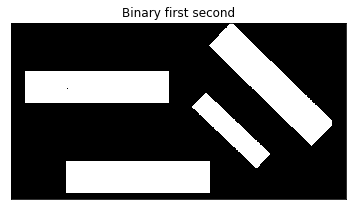

In [23]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,150,255,cv.THRESH_BINARY)

plt.subplot(),plt.imshow(thresh, cmap = 'gray')
plt.title('Binary first'), plt.xticks([]), plt.yticks([])
plt.show()

ret, thresh2 = cv.threshold(gray,215,255,cv.THRESH_BINARY_INV)

plt.subplot(),plt.imshow(thresh2, cmap = 'gray')
plt.title('Binary first second'), plt.xticks([]), plt.yticks([])
plt.show()

for i in range(thresh.shape[0]):
    for j in range(thresh.shape[1]):
        if thresh[i,j]==255:
                thresh[i,j]=thresh2[i,j]

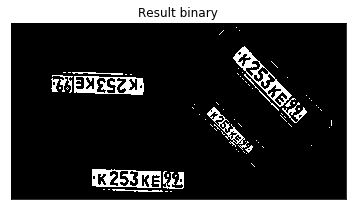

In [24]:
plt.subplot(),plt.imshow(thresh, cmap = 'gray')
plt.title('Result binary'), plt.xticks([]), plt.yticks([])
plt.show()

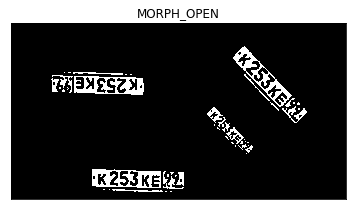

In [25]:
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 1)

plt.subplot(),plt.imshow(opening,cmap='gray')
plt.title('MORPH_OPEN'), plt.xticks([]), plt.yticks([])
plt.show()

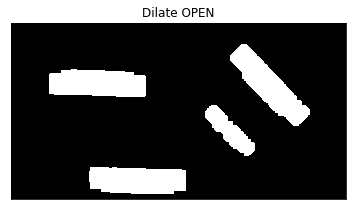

In [26]:
sure_bg = cv.dilate(opening,kernel,iterations=8)

plt.subplot(),plt.imshow(sure_bg,cmap='gray')
plt.title('Dilate OPEN'), plt.xticks([]), plt.yticks([])
plt.show()

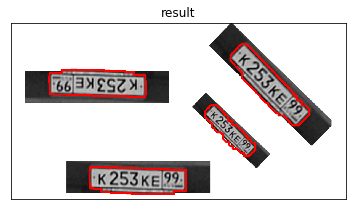

In [27]:
contours, hierarchy = cv.findContours(sure_bg,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
resultImage = cv.drawContours(image.copy(), contours, -1, (255, 0, 0), 6, cv.LINE_AA, hierarchy, 2)
plt.subplot(),plt.imshow(resultImage, cmap = 'gray')
plt.title('result'), plt.xticks([]), plt.yticks([])
plt.show()

In [28]:
print("Количество номеров авто = ", len(contours))

Количество номеров авто =  4
